In [1]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'e:\\ML & Data\\Projects\\HousingPricePredictions\\CaliforniaHousingPrices\\Model'

In [3]:
raw_data = pd.read_csv('e:\\ML & Data\\Projects\\CaliforniaHousingPrices\\Data\\housing.csv')
raw_data.head(25)

FileNotFoundError: [Errno 2] No such file or directory: 'e:\\ML & Data\\Projects\\CaliforniaHousingPrices\\Data\\housing.csv'

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
raw_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
test_data = raw_data.copy()
test_data['room/house'] = round(test_data['total_rooms'] / test_data['households'],2)

In [ ]:
test_data['bedroom/house'] = round(test_data['total_bedrooms'] / test_data['households'],2)

In [ ]:
test_data.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room/house,bedroom/house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.98,1.02
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.24,0.97
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.29,1.07
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.82,1.07
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.28,1.08
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.76,1.10
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.93,0.95
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.80,1.06
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.29,1.12
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.97,0.99


In [ ]:
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room/house,bedroom/house
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429021,1.097069
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474190,0.476113
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.850000,0.330000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440000,1.010000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.230000,1.050000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.050000,1.100000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.910000,34.070000


In [ ]:
test_data = test_data[~(test_data['total_bedrooms'].isnull())]

In [ ]:
test_data['longitude'].value_counts()

longitude
-118.31    159
-118.30    157
-118.29    146
-118.27    141
-118.32    141
          ... 
-114.62      1
-116.73      1
-114.31      1
-115.96      1
-114.63      1
Name: count, Length: 844, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

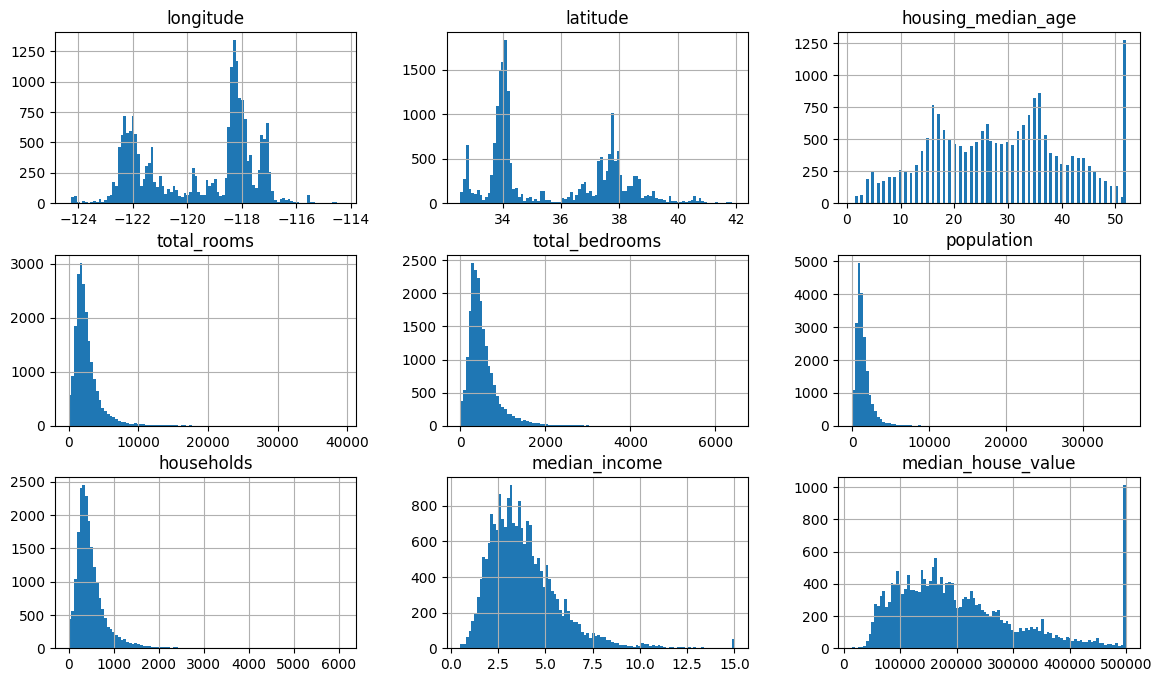

In [ ]:
raw_data.hist(bins = 100,figsize=(14,8))

In [ ]:
len(raw_data[raw_data['total_rooms'] > 6000])

1140

In [ ]:
data_without_otliners = raw_data.copy()
data_without_otliners = data_without_otliners[~(data_without_otliners['total_rooms'] > 6000)]

In [ ]:
data_without_otliners = data_without_otliners[~(data_without_otliners['total_bedrooms'] > 1000)]

In [ ]:
data_without_otliners['condition'] = round(data_without_otliners['population'] / data_without_otliners['households'],2)

In [ ]:
data_without_otliners = data_without_otliners[~(data_without_otliners['condition'] > 5)]

In [ ]:
data_without_otliners = data_without_otliners[~data_without_otliners['total_bedrooms'].isnull()]

In [ ]:
data_without_otliners[data_without_otliners['households'] > 1000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,condition
1806,-117.27,33.21,5.0,5764.0,996.0,3161.0,1012.0,4.4531,177500.0,<1H OCEAN,3.12
5938,-120.47,37.32,15.0,3952.0,984.0,2024.0,1026.0,2.5580,121600.0,INLAND,1.97
7189,-118.37,33.85,25.0,5622.0,998.0,2537.0,1009.0,5.7850,395300.0,<1H OCEAN,2.51
9570,-122.47,37.67,20.0,5689.0,992.0,3752.0,1002.0,5.5845,304300.0,NEAR OCEAN,3.74
12301,-121.83,37.38,15.0,4430.0,992.0,3278.0,1018.0,4.5533,209900.0,<1H OCEAN,3.22
15817,-122.57,37.99,38.0,5587.0,996.0,2466.0,1027.0,4.1711,336900.0,NEAR BAY,2.40
16411,-117.75,34.12,25.0,5411.0,998.0,2243.0,1019.0,4.3148,240700.0,INLAND,2.20


In [ ]:
data_without_otliners = data_without_otliners[~(data_without_otliners['median_house_value'] == 500001)]
data_without_otliners

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,condition
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.56
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.80
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.55
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.18
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,2.14
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.56
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3.12
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.33
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.12


In [ ]:
data_without_otliners = data_without_otliners.drop('condition',axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

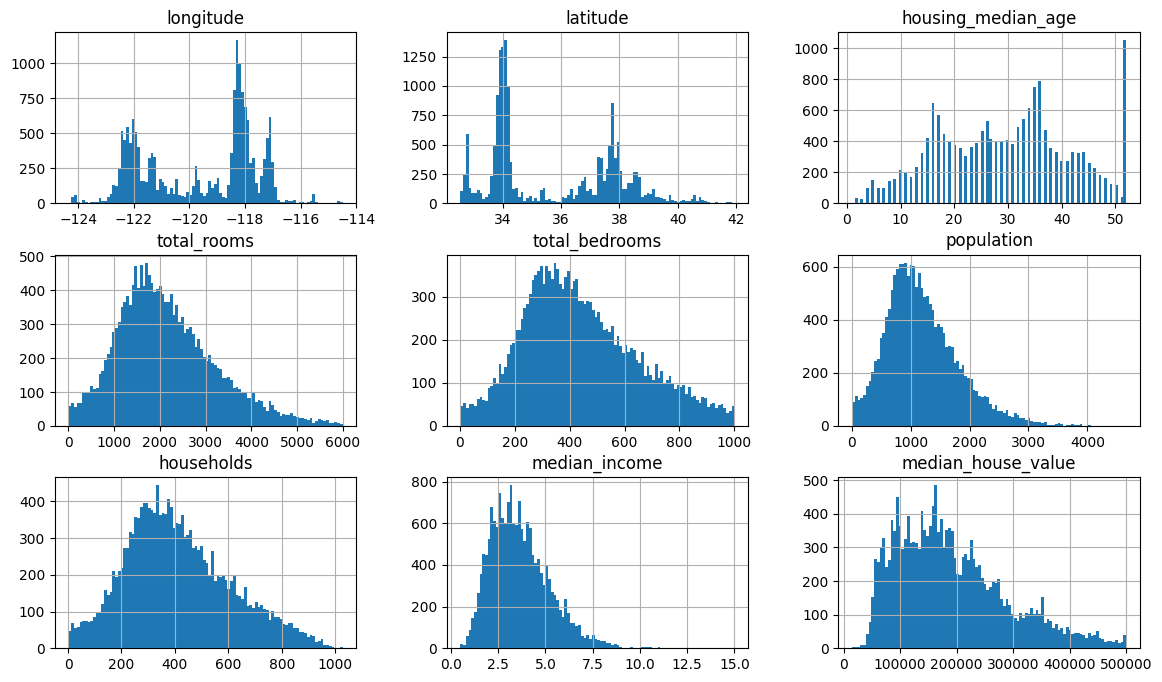

In [ ]:
data_without_otliners.hist(bins = 100,figsize=(14,8))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

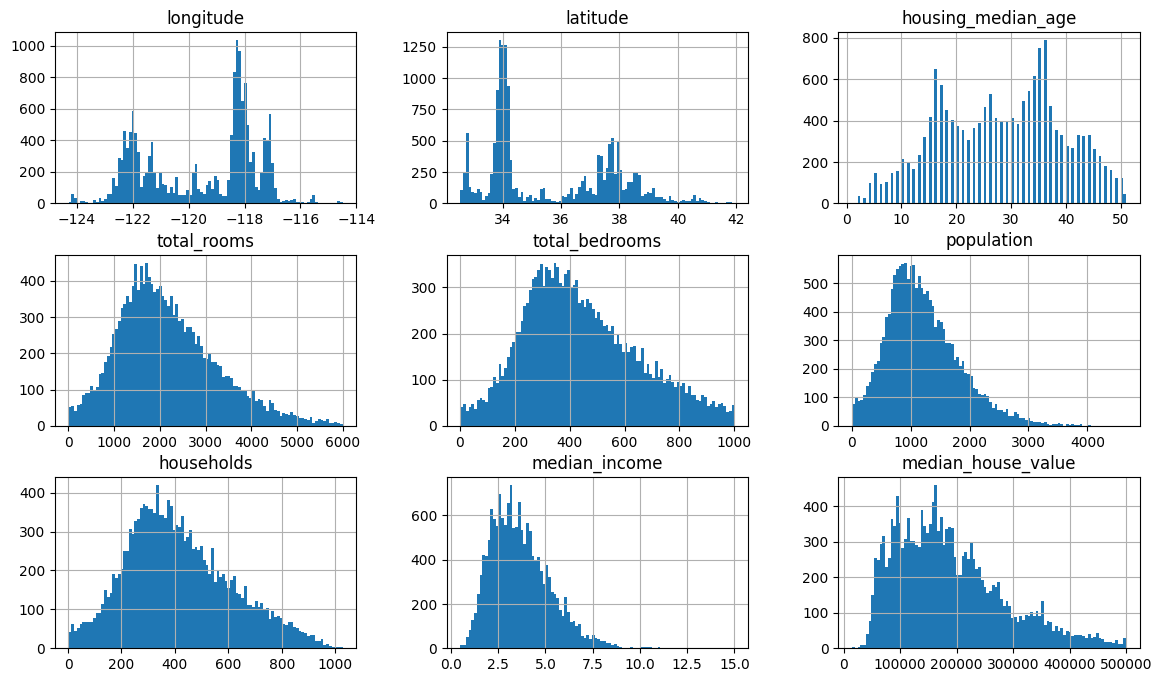

In [ ]:
data_without_otliners = data_without_otliners[~(data_without_otliners['housing_median_age'] > 51)]
data_without_otliners.hist(bins = 100,figsize=(14,8))

In [ ]:
data_without_otliners

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_tranformer = FunctionTransformer(np.log)


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>]], dtype=object)

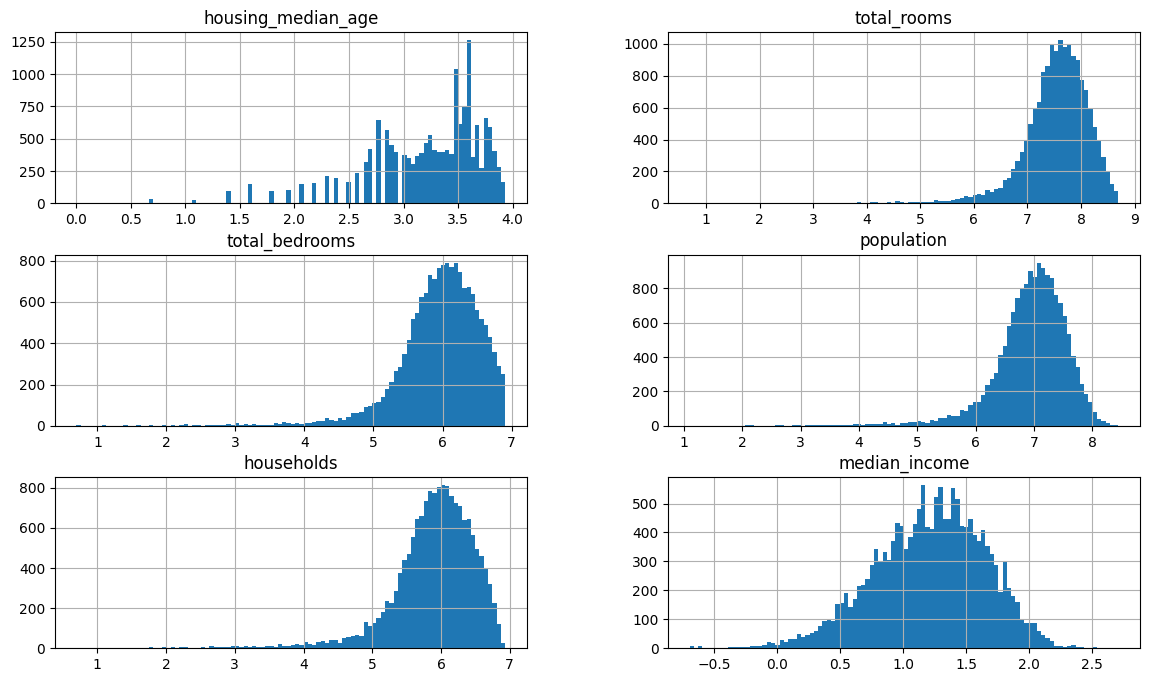

In [ ]:
test = data_without_otliners.drop(['longitude','latitude','ocean_proximity','median_house_value'],axis=1).copy()
data_log = log_tranformer.fit_transform(test)
data_log.hist(bins = 100,figsize=(14,8))

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>]], dtype=object)

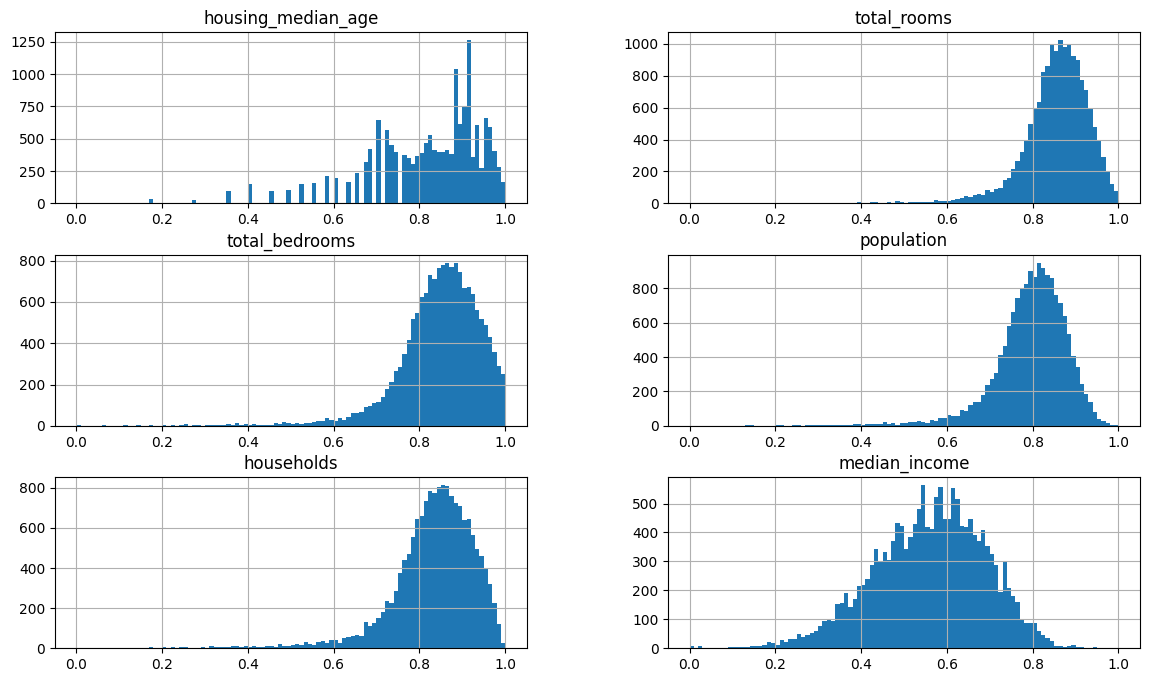

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_log)
scaled = pd.DataFrame(scaled,columns= data_log.columns)
scaled.hist(bins = 100,figsize=(14,8))

In [ ]:
data_without_otliners['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7206
INLAND        5584
NEAR OCEAN    2075
NEAR BAY      1372
ISLAND           2
Name: count, dtype: int64

In [ ]:
data_non_numeric = data_without_otliners[['ocean_proximity']].copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_non_numeric)
encoded_data = encoded_data.toarray()
columns = encoder.get_feature_names_out()
final_columns = [name.split('_')[2] for name in columns]
encoded_data = pd.DataFrame(encoded_data,columns= final_columns)
encoded_data

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
16234,0.0,1.0,0.0,0.0,0.0
16235,0.0,1.0,0.0,0.0,0.0
16236,0.0,1.0,0.0,0.0,0.0
16237,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_target = data_without_otliners[['median_house_value']]
df_target = df_target.reset_index()
df_target = df_target.drop(['index'],axis=1)

In [ ]:
df_input = scaled.copy()
df_input_final = pd.concat([df_input,encoded_data],axis=1)
df_input_final

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.944491,0.760368,0.670463,0.636342,0.663831,0.826904,0.0,0.0,0.0,1.0,0.0
1,0.950619,0.893520,0.934353,0.816048,0.912544,0.419211,0.0,0.0,0.0,1.0,0.0
2,0.994964,0.790495,0.796880,0.741434,0.782344,0.425448,0.0,0.0,0.0,1.0,0.0
3,0.994964,0.877028,0.873289,0.789190,0.856355,0.406313,0.0,0.0,0.0,1.0,0.0
4,0.938210,0.740566,0.727606,0.668889,0.708006,0.293765,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16234,0.818672,0.840026,0.841744,0.767638,0.818097,0.334634,0.0,1.0,0.0,0.0,0.0
16235,0.735122,0.731245,0.694732,0.650002,0.647795,0.479832,0.0,1.0,0.0,0.0,0.0
16236,0.720585,0.877862,0.883564,0.791507,0.861621,0.359844,0.0,1.0,0.0,0.0,0.0
16237,0.735122,0.853861,0.856139,0.749764,0.827066,0.387424,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_input_with_geo = data_without_otliners[['longitude','latitude']]
df_input_with_geo = df_input_with_geo.reset_index()
df_input_with_geo = df_input_with_geo.drop('index',axis=1)
df_input_with_geo = pd.concat([df_input_with_geo,scaled],axis=1)

In [ ]:
df_input_with_geo_final = pd.concat([df_input_with_geo,encoded_data],axis=1)

In [ ]:
df_input_with_geo_final = df_input_with_geo_final.drop('NEAR OCEAN',axis=1)
df_input_with_geo_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,0.944491,0.760368,0.670463,0.636342,0.663831,0.826904,0.0,0.0,0.0,1.0
1,-122.26,37.84,0.950619,0.893520,0.934353,0.816048,0.912544,0.419211,0.0,0.0,0.0,1.0
2,-122.26,37.85,0.994964,0.790495,0.796880,0.741434,0.782344,0.425448,0.0,0.0,0.0,1.0
3,-122.26,37.84,0.994964,0.877028,0.873289,0.789190,0.856355,0.406313,0.0,0.0,0.0,1.0
4,-122.27,37.85,0.938210,0.740566,0.727606,0.668889,0.708006,0.293765,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16234,-121.09,39.48,0.818672,0.840026,0.841744,0.767638,0.818097,0.334634,0.0,1.0,0.0,0.0
16235,-121.21,39.49,0.735122,0.731245,0.694732,0.650002,0.647795,0.479832,0.0,1.0,0.0,0.0
16236,-121.22,39.43,0.720585,0.877862,0.883564,0.791507,0.861621,0.359844,0.0,1.0,0.0,0.0
16237,-121.32,39.43,0.735122,0.853861,0.856139,0.749764,0.827066,0.387424,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_input_final,df_target['median_house_value'],test_size=0.3,random_state=1)

In [ ]:
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
result = forest_model.predict(X_test)

In [ ]:
mean_squared_error(result,y_test)

3087271052.7700257

In [ ]:
forest_model.score(X_test,y_test)

0.6648508627323133

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_input_with_geo_final,df_target['median_house_value'],test_size=0.3)

In [ ]:
forest_model_geo = RandomForestRegressor(n_estimators=100)
forest_model_geo.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
forest_model_geo.score(X_test,y_test)

0.7959178933628724

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

log_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=True)), 
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('log_scaled', log_transformer, ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']),
        ('ohe', OneHotEncoder(), ['ocean_proximity']),
        ('pass_through', 'passthrough', ['longitude', 'latitude'])
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100,max_depth=10))
])


In [ ]:
data_without_otliners.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data_without_otliners.drop('median_house_value',axis=1),df_target['median_house_value'],test_size=0.3,random_state=42)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log_scaled',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['ocean_proximity']),
                                                 ('pass_through', 'passthrough',
                                                  ['longitude', 'latitude'])])),
                ('model', RandomForestRegressor(max_depth=10))])

In [ ]:
pipeline.score(X_test,y_test)

0.7614492969711264

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
predictions = pipeline.predict(X_test)
mse = root_mean_squared_error(predictions,y_test)

In [ ]:
mse

46367.02489618135

In [ ]:
predictions

array([ 74137.33434501, 275684.58416879, 191068.79331277, ...,
       157526.86070531, 133352.21284806, 219735.00906152])

In [ ]:
predictions_trained_data  = pipeline.predict(X_train)
mse_trained = root_mean_squared_error(predictions_trained_data,y_train)

In [ ]:
mse_trained 

36196.80611214865